<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/HW4/PUS2020_HW_4_how_to_read_and_map_census_data_in_python_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# author: Federica Bianco (@fedhere)

Notebook with examples of how to read and plot cenusus data in python



In [1]:
!pip install census
!pip install CensusData

     |████████████████████████████████| 23.2MB 45kB/s 
  Created wheel for CensusData: filename=CensusData-1.9-cp36-none-any.whl size=24706266 sha256=3bf6154dd5a0fbf5f9a68005df6fb11d467708fdf00683a9086d46ce4c9ca893
  Stored in directory: /root/.cache/pip/wheels/39/4c/19/0770e56b66921fd366a5d32382b3db71e54aa98259f6bc88cb
Successfully built CensusData


In [2]:
!pip install us


     |████████████████████████████████| 133kB 3.7MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=d84e02bbc434f681b1bf9fb679d002f3798819257ba97ebe658160cf7fc12f99
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74747 sha256=6f5a8f7dfde934377a7a4b39ebd9f5f80d02d9d39cfc3bff7569c12db1b0ba19
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 
     |████████████████████████████████| 10.9MB 10.4MB/s 


In [4]:
!pip install shapely

In [5]:
# module for mapping; if you are familiar with pandas this should be intuitive
import geopandas as gpd

In [6]:
import pandas as pd
import numpy as np
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# mounting your drive (My Drive) to read the api key from a csv file. Look at the readme for more info

In [8]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [9]:
pwd

'/content/gdrive/My Drive'

In [10]:
ls

 기타/
 운동/
 자산관리/
'1. Research Experience'/
'2019.01.04-05 New York.zip'
'미국 정착 2019 Bill .gsheet'
 2020.01.08..ipynb
'2020 List of Online Collections.gsheet'
'2020 List of Online Collections.xlsx'
 20DSPP_kay/
 20GEOG_AdvGIS_Assignments/
 20MLPP_kay/
'2. Work Experience'/
'3. Community Service'/
'4. Language'/
'5. 추억 사진'/
'American Government.pdf'
 Background.zip
'body line.gsheet'
 BWRN-ADP/
'Climate Change and Society.pdf'
'Colab Notebooks'/
 congress_tweets_2019.tsv
 Elantra_Price_2020.08.21..gsheet
'ENEP250 - Survey on the choices for assignments .gform'
 flooding/
 gst_dem_fig_5_11.png
'Handbook of STS.pdf'
'ITA_Climate Change Politics(2019.08.12.) ver.3.gslides'
 KAT_Group_Final/
'Local Adaptation Plan of Action (LAPA), Pildonibolo village (Jamoat Pildon, Jirgatol District), Tajikistan.docx'
 log_emissions.png
 mlpp20/
 mlpp20_group/
 myapi.csv
'New York City Travel (01 04-05 2020).gsheet'
 PUS2020/
'Takikistan Paper 2'/
 tl_2018_10_tract.cpg
 tl_2018_10_

## read about the census API DO NOT PRINT IT! your API key should be secret

In [11]:
myAPIkey =  pd.read_csv("myapi.csv")["census"]

# example of reading race data at the county level.

In [12]:
# import modules to get census data
# register with your API key
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

### look in the census variables the ones apprioriate for race. 

We are going to use the 5 year American Community Survey (```acs5```), which is ran by the Census Boureaum, but it is not the Census, in that it does not aspire to collect data about every US resident, but it is run more often (5 years). There is also an annual American Community Survey (```acs1```)

In [13]:
censusdata.search('acs5', 2018, 'concept', 'race')

[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

These are the variables that interest us. They start with B02001

('B02001_001E', 'RACE', 'Estimate!!Total'),

('B02001_002E', 'RACE', 'Estimate!!Total!!White alone'),

 ('B02001_003E', 'RACE', 'Estimate!!Total!!Black or African American alone'),

 

In [14]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B02001')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | RACE                           | !! Estimate Total                                        | int  
B02001_002E  | RACE                           | !! !! Estimate Total White alone                         | int  
B02001_003E  | RACE                           | !! !! Estimate Total Black or African American alone     | int  
B02001_004E  | RACE                           | !! !! Estimate Total American Indian and Alaska Native a | int  
B02001_005E  | RACE                           | !! !! Estimate Total Asian alone                         | int  
B02001_006E  | RACE                           | !! !! Estimate Total Native Hawaiian and Other Pacific I | int  
B02001_007E  | RACE                           | !! !! Estimate Total Some other race alone   

(None,)

get the state code for DE

In [15]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

get the data at county granularity. Tract granularity is not available for these data in this survey

In [16]:
total18 = censusdata.download('acs5', 2018, 
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
bDEcounty18

# get the same data for the _previous_ ACS5 as well (remember, the ACS5 is done every 5 years)

In [19]:
censusdata.search('acs5', 2013, 'concept', 'race')

[('B01001F_001E', 'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)', 'Total:'),
 ('B01001F_001M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Total:'),
 ('B01001F_002E', 'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)', 'Male:'),
 ('B01001F_002M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:'),
 ('B01001F_003E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!Under 5 years'),
 ('B01001F_003M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!Under 5 years'),
 ('B01001F_004E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!5 to 9 years'),
 ('B01001F_004M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!5 to 9 years'),
 ('B01001F_005E',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Male:!!10 to 14 years'),
 ('B01001F_005M',
  'B01001F.  SEX BY AGE (SOME OTHER RACE ALONE)',
  'Margin Of Error For!!Male:!!10 to 14 years'),
 ('B01001F_

In [20]:
censusdata.printtable(censusdata.censustable('acs5', 2013, 'B02001')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | B02001.  Race                  | Total:                                                   | int  
B02001_002E  | B02001.  Race                  | White alone                                              | int  
B02001_003E  | B02001.  Race                  | Black or African American alone                          | int  
B02001_004E  | B02001.  Race                  | American Indian and Alaska Native alone                  | int  
B02001_005E  | B02001.  Race                  | Asian alone                                              | int  
B02001_006E  | B02001.  Race                  | Native Hawaiian and Other Pacific Islander alone         | int  
B02001_007E  | B02001.  Race                  | Some other race alone                        

(None,)

In [21]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2013)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [22]:
total13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
bDEcounty13

,B02001_003E
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029


## merge the blackpop dataframe with the total dataframe to extract the fraction of black people. 
## merge the whitepop dataframe with the total dataframe to extract the fraction of white people. 
 

In [23]:
bDEcounty18 = bDEcounty18.merge(total18, left_index=True, right_index=True)
bDEcounty13 = bDEcounty13.merge(total13, left_index=True, right_index=True)

wDEcounty18 = wDEcounty18.merge(total18, left_index=True, right_index=True)
wDEcounty13 = wDEcounty13.merge(total13, left_index=True, right_index=True)

In [24]:
#bDEcounty18 = bDEcounty18.merge(total18, left_on=bDEcounty18.index, right_on=total18.index)
#bDEcounty13 = bDEcounty13.merge(total13, left_on=bDEcounty13.index, right_on=total13.index)

#wDEcounty18 = wDEcounty18.merge(total18, left_on=wDEcounty18.index, right_on=total18.index)
#wDEcounty13 = wDEcounty13.merge(total13, left_on=wDEcounty13.index, right_on=total13.index)

In [25]:
bDEcounty18["black_fraction"] =  bDEcounty18["B02001_003E"] / total18["B02001_001E"] 
bDEcounty13["black_fraction"] =  bDEcounty13["B02001_003E"] / total13["B02001_001E"] 

wDEcounty18["white_fraction"] =  wDEcounty18["B02001_002E"] / total18["B02001_001E"] 
wDEcounty13["white_fraction"] =  wDEcounty13["B02001_002E"] / total13["B02001_001E"] 

## the county index needs to be manipulated
The county name in the dataframes you created needs to be extracted from the index. 
Use the method ```split``` of a string on each row of the index. you can write a function such as

```
def getcounty(cname):
  return cname.split(':')[-1]
```
a function like this will extract the county from the name, this function can be passed to a column (the index in this case) of a dataframe to create a new colum as a modification of the previous one.

In [26]:
def scounty(cname):
  return cname.split(':')[-1]

In [27]:
#bDEcounty18["key_0"].astype(str).values[0]
#scounty(wDEcounty18['key_0'].astype(str).values[0])

In [28]:
#wDEcounty18["county"] = wDEcounty18["key_0"].astype(str).map(scounty)
#bDEcounty18["county"] = bDEcounty18["key_0"].astype(str).map(scounty)

#wDEcounty13["county"] = wDEcounty13["key_0"].astype(str).map(scounty)
#bDEcounty13["county"] = bDEcounty13["key_0"].astype(str).map(scounty)

In [29]:
# manipulate index to extract the county
wDEcounty18["county"] = wDEcounty18.index.astype(str).map(scounty)
bDEcounty18["county"] = bDEcounty18.index.astype(str).map(scounty)

wDEcounty13["county"] = wDEcounty13.index.astype(str).map(scounty)
bDEcounty13["county"] = bDEcounty13.index.astype(str).map(scounty)

# Get the DE shape file. 

Lets get it at the census tract level, even if we only have data at the county level right now
## download census tracts file from here  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
## and here  https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip


In [30]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip

--2020-09-28 23:27:34--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 172.224.200.156, 2600:1402:16:387::208c, 2600:1402:16:3a3::208c
Connecting to www2.census.gov (www2.census.gov)|172.224.200.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip.6’

tl_2018_10_tract.zi     [ <=>                ] 997.34K  --.-KB/s    in 0.1s    

2020-09-28 23:27:35 (9.39 MB/s) - ‘tl_2018_10_tract.zip.6’ saved [1021272]



In [31]:
#save it on the drive, unzip it
!unzip tl_2018_10_tract.zip

Archive:  tl_2018_10_tract.zip
replace tl_2018_10_tract.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: tl_2018_10_tract.cpg    
  inflating: tl_2018_10_tract.dbf    
  inflating: tl_2018_10_tract.prj    
  inflating: tl_2018_10_tract.shp    
  inflating: tl_2018_10_tract.shp.ea.iso.xml  
  inflating: tl_2018_10_tract.shp.iso.xml  
  inflating: tl_2018_10_tract.shx    


In [32]:
gde = gpd.GeoDataFrame.from_file("tl_2018_10_tract.shp")
gde.shape

(218, 13)

In [33]:
gde

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,10,003,013100,10003013100,131,Census Tract 131,G5020,S,1613786,0,+39.7263367,-075.6452156,"POLYGON ((-75.65822 39.72372, -75.65810 39.723..."
214,10,003,013200,10003013200,132,Census Tract 132,G5020,S,1501028,0,+39.7352253,-075.6451879,"POLYGON ((-75.65585 39.73491, -75.65563 39.735..."
215,10,003,013000,10003013000,130,Census Tract 130,G5020,S,1224452,0,+39.7192005,-075.6426024,"POLYGON ((-75.65289 39.71829, -75.65157 39.719..."
216,10,003,013400,10003013400,134,Census Tract 134,G5020,S,2521158,0,+39.7425629,-075.6542951,"POLYGON ((-75.66617 39.73174, -75.66614 39.731..."


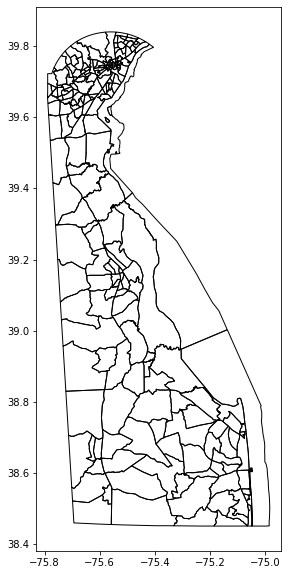

In [34]:
gde.plot(color="None", edgecolor='k',figsize=(5,10))

This map includes census tracts that are all water in the Delaware rever. Remove them using the ALAND column, which is the area of the tract that is not water

In [35]:
#delete
# only select where the land is >0
gde = gde[gde["ALAND"] > 0]
gde.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


Now merge the geo data frame with the data frame. 
IMPORTANT! start the merge from the geodataframe:
```gde.merge...```. 
if you start it from the dataframe (```wDEcounty.merge```) you end up with a dataframe, not a geodataframe

In [36]:
whiteDE18 = gde.merge(wDEcounty18, left_on= "COUNTYFP", right_on="county")
whiteDE13 = gde.merge(wDEcounty13, left_on= "COUNTYFP", right_on="county")

blackDE18 = gde.merge(bDEcounty18, left_on= "COUNTYFP", right_on="county")
blackDE13 = gde.merge(bDEcounty13, left_on= "COUNTYFP", right_on="county")

In [37]:
blackDE18

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B02001_003E,B02001_001E,black_fraction,county
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824...",26992,219540,0.122948,005
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607...",26992,219540,0.122948,005
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451...",26992,219540,0.122948,005
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549...",26992,219540,0.122948,005
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710...",26992,219540,0.122948,005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,10,001,041802,10001041802,418.02,Census Tract 418.02,G5020,S,34346203,142420,+39.1375473,-075.6031845,"POLYGON ((-75.64732 39.15436, -75.64701 39.154...",44292,174822,0.253355,001
211,10,001,041801,10001041801,418.01,Census Tract 418.01,G5020,S,42321326,30818,+39.1834676,-075.6065524,"POLYGON ((-75.65125 39.17231, -75.65121 39.172...",44292,174822,0.253355,001
212,10,001,041100,10001041100,411,Census Tract 411,G5020,S,15640684,1308622,+39.1219039,-075.4698695,"POLYGON ((-75.49917 39.11309, -75.49911 39.113...",44292,174822,0.253355,001
213,10,001,041900,10001041900,419,Census Tract 419,G5020,S,83120848,21319,+39.1464350,-075.7077338,"POLYGON ((-75.75226 39.19946, -75.74623 39.200...",44292,174822,0.253355,001


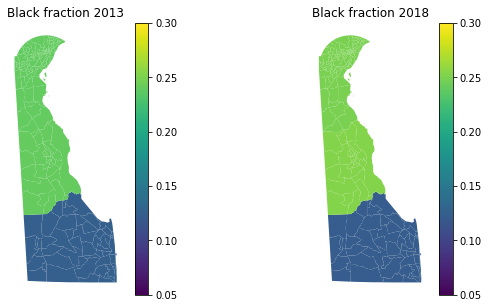

In [38]:
# map the fraction of Black populatoin in 2018 and 2013
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
blackDE13.plot(column="black_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.05, vmax=0.30)
ax.axis('off');
plt.title("Black fraction 2013")

ax = fig.add_subplot(122)
blackDE18.plot(column="black_fraction", 
               ax=ax, legend=True, vmin=0.05, vmax=0.30);
ax.axis('off');
plt.title("Black fraction 2018");

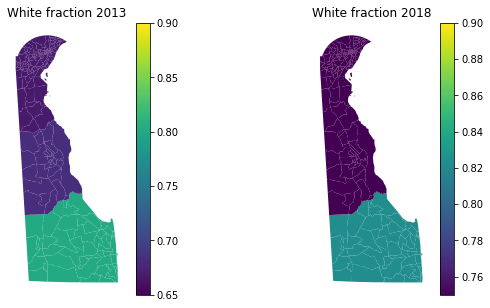

In [39]:
# do the same for the white population
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
whiteDE13.plot(column="white_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.65, vmax=0.90)
ax.axis('off');
plt.title("White fraction 2013")

ax = fig.add_subplot(122)
whiteDE18.plot(column="white_fraction", 
               ax=ax, legend=True, vmin=0.75, vmax=0.90);
ax.axis('off');
plt.title("White fraction 2018");

# extra credit

Can you get a map of a demographic variable (e.g. age, education...) at the tract level?

In [40]:
censusdata.search('acs5', 2018, 'concept', 'age')

[('B01001A_001E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total'),
 ('B01001A_002E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total!!Male'),
 ('B01001A_003E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001A_004E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001A_005E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001A_006E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001A_007E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001A_008E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001A_009E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001A_010E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001A_011E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!35 to 44 years'),
 ('B01001A_012E',
  'SEX BY AGE (WHI

'B01001_001E', 'SEX BY AGE', 'Estimate!!Total'

In [41]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01001')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

(None,)

B01001_001E  | SEX BY AGE                     | !! Estimate Total  

B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male

B01001_026E  | SEX BY AGE                     | !! !! Estimate Total Female

B01001_011E  | SEX BY AGE                     | !! !! !! Estimate Total Male 25 to 29 years

B01001_035E  | SEX BY AGE                     | !! !! !! Estimate Total Female 25 to 29 years


In [42]:
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '*')]), 'acs5', 2018)

{'Kent County, Delaware': censusgeo((('state', '10'), ('county', '001'))),
 'New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'))),
 'Sussex County, Delaware': censusgeo((('state', '10'), ('county', '005')))}

In [43]:
censusdata.geographies(censusdata.censusgeo([('state', '10'), ('county', '003'), ('tract', '*')]), 'acs5', 2018) 

{'Census Tract 101.01, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010101'))),
 'Census Tract 101.04, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010104'))),
 'Census Tract 102, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010200'))),
 'Census Tract 103, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010300'))),
 'Census Tract 104, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010400'))),
 'Census Tract 105.02, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010502'))),
 'Census Tract 107.02, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010702'))),
 'Census Tract 108, New Castle County, Delaware': censusgeo((('state', '10'), ('county', '003'), ('tract', '010800'))),
 'Census Tract 109, New Cast

In [79]:
age_total18 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '10'), ('county', '*'), ('tract', '*')]), ["B01001_001E"])

# by sex
mDEtract18 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '10'), ('county', '*'), ('tract', '*')]), ["B01001_002E"])
fDEtract18 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '10'), ('county', '*'), ('tract', '*')]), ["B01001_026E"])

# age between 25 and 29
mDEtract18_2529 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '10'), ('county', '*'), ('tract', '*')]), ["B01001_011E"])
fDEtract18_2529 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '10'), ('county', '*'), ('tract', '*')]), ["B01001_035E"])

In [80]:
mDEtract18 = mDEtract18.merge(age_total18, left_index=True, right_index=True)
fDEtract18 = fDEtract18.merge(age_total18, left_index=True, right_index=True)

mDEtract18_2529 = mDEtract18_2529.merge(age_total18, left_index=True, right_index=True)
fDEtract18_2529 = fDEtract18_2529.merge(age_total18, left_index=True, right_index=True)

In [81]:
mDEtract18["male_fraction"] =  mDEtract18["B01001_002E"] / age_total18["B01001_001E"] 
fDEtract18["female_fraction"] =  fDEtract18["B01001_026E"] / age_total18["B01001_001E"] 

mDEtract18_2529["male2529_fraction"] =  mDEtract18_2529["B01001_011E"] / age_total18["B01001_001E"] 
fDEtract18_2529["female2529_fraction"] =  fDEtract18_2529["B01001_035E"] / age_total18["B01001_001E"] 

In [57]:
def scounty(cname):
  return cname.split(':')[-1]

In [82]:
mDEtract18["tract"] = mDEtract18.index.astype(str).map(scounty)
fDEtract18["tract"] = fDEtract18.index.astype(str).map(scounty)

mDEtract18_2529["tract"] = mDEtract18_2529.index.astype(str).map(scounty)
fDEtract18_2529["tract"] = fDEtract18_2529.index.astype(str).map(scounty)

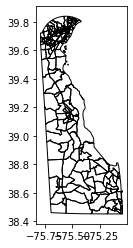

In [59]:
gde.plot(color="None", edgecolor='k')

In [60]:
gde

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,10,003,012600,10003012600,126,Census Tract 126,G5020,S,1900714,0,+39.7244427,-075.6075405,"POLYGON ((-75.61854 39.73048, -75.61844 39.730..."
213,10,003,013100,10003013100,131,Census Tract 131,G5020,S,1613786,0,+39.7263367,-075.6452156,"POLYGON ((-75.65822 39.72372, -75.65810 39.723..."
214,10,003,013200,10003013200,132,Census Tract 132,G5020,S,1501028,0,+39.7352253,-075.6451879,"POLYGON ((-75.65585 39.73491, -75.65563 39.735..."
215,10,003,013000,10003013000,130,Census Tract 130,G5020,S,1224452,0,+39.7192005,-075.6426024,"POLYGON ((-75.65289 39.71829, -75.65157 39.719..."


In [83]:
fDEtract18_2529

,B01001_035E,B01001_001E,female2529_fraction,tract
"Census Tract 4, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:000400",55,2933,0.018752,000400
"Census Tract 13, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:001300",101,3512,0.028759,001300
"Census Tract 26, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:002600",187,3512,0.053246,002600
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",41,2157,0.019008,010200
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",183,3220,0.056832,010300
...,...,...,...,...
"Census Tract 507.04, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050704",117,4690,0.024947,050704
"Census Tract 507.05, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050705",204,4506,0.045273,050705
"Census Tract 509.01, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050901",90,2662,0.033809,050901
"Census Tract 509.02, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050902",20,4664,0.004288,050902


In [84]:
maleDE18 = gde.merge(mDEtract18, left_on= "TRACTCE", right_on="tract")
femaleDE18 = gde.merge(fDEtract18, left_on= "TRACTCE", right_on="tract")

maleDE18_2529 = gde.merge(mDEtract18_2529, left_on= "TRACTCE", right_on="tract")
femaleDE18_2529 = gde.merge(fDEtract18_2529, left_on= "TRACTCE", right_on="tract")

In [86]:
print(maleDE18["male_fraction"].max())
print(maleDE18["male_fraction"].min())
print("")
print(femaleDE18["female_fraction"].max())
print(femaleDE18["female_fraction"].min())
print("")
print(maleDE18_2529["male2529_fraction"].max())
print(maleDE18_2529["male2529_fraction"].min())
print("")
print(femaleDE18_2529["female2529_fraction"].max())
print(femaleDE18_2529["female2529_fraction"].min())

0.8127956186208614
0.3438520130576714

0.6561479869423286
0.18720438137913867

0.12222853894258101
0.0

0.13303013075611142
0.0


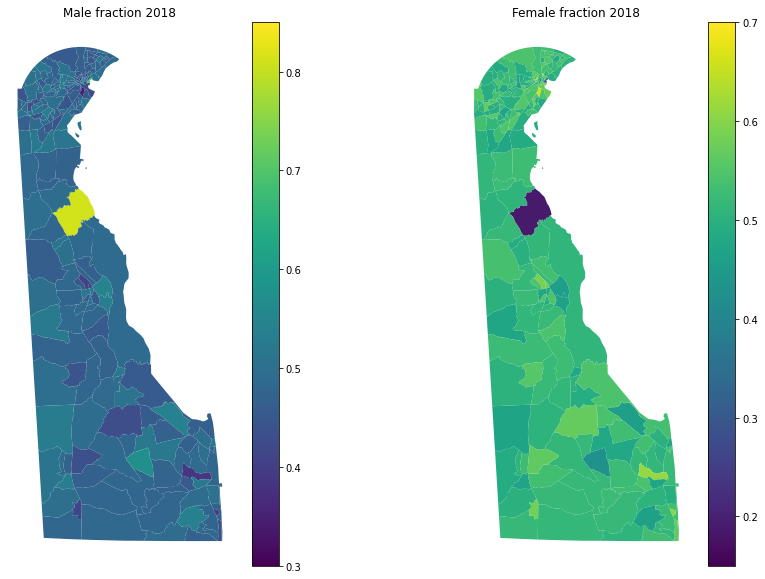

In [90]:
# Total Male & Female
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)
maleDE18.plot(column="male_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.3, vmax=0.85)
ax.axis('off');
plt.title("Male fraction 2018")

ax = fig.add_subplot(122)
femaleDE18.plot(column="female_fraction", 
               ax=ax, legend=True, vmin=0.15, vmax=0.70);
ax.axis('off');
plt.title("Female fraction 2018");

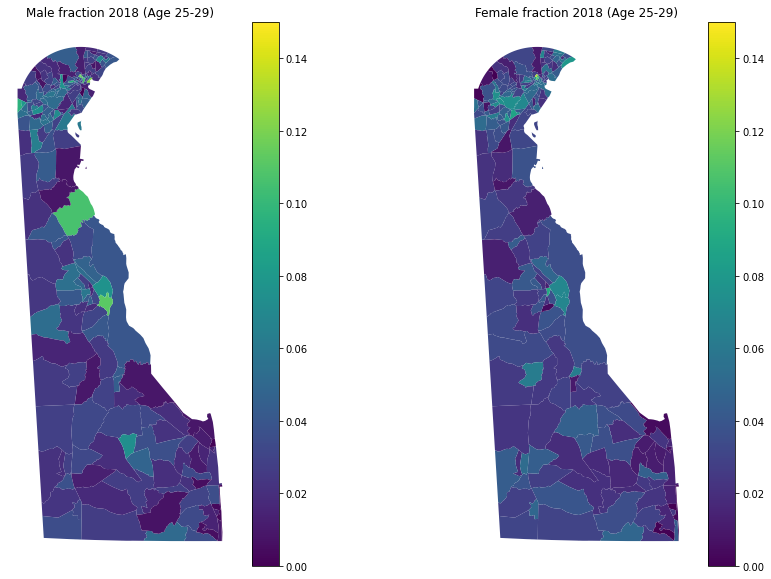

In [92]:
# Male & Female (Age between 25 and 29)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(121)
maleDE18_2529.plot(column="male2529_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.0, vmax=0.15)
ax.axis('off');
plt.title("Male fraction 2018 (Age 25-29)")

ax = fig.add_subplot(122)
femaleDE18_2529.plot(column="female2529_fraction", 
               ax=ax, legend=True, vmin=0.0, vmax=0.15);
ax.axis('off');
plt.title("Female fraction 2018 (Age 25-29)");